# SVR

<p style='text-align: justify;'><b>SVR</b> por sus siglas en inglés provenientes de <b>Support Vector Regression</b> es un algoritmo de regresión basado en las máquinas de soporte vectorial utilizados para clasificar elementos de diferentes conjuntos. En la siguiente sección se explicara cómo funciona el algoritmo SVR con datos lineales, pero es importante saber que este algoritmo también funciona para datos no lineales.</p>  

In [16]:
from sklearn.datasets import load_boston

# Cargamos un conjunto de datos
boston_dataset = load_boston()
# Se carga con pandas para tratamiento posterior
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [18]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [19]:
# Normalizacion de datos
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [20]:
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [21]:
from sklearn.svm import SVR

#VAMOS A PROBAR TRES TIPOS DE MODELOS DE REGRESION CON KERNEL (hay más, ver documentacion)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [22]:
# RBF

# Creando el modelo y entrenando 
reg = svr_rbf.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

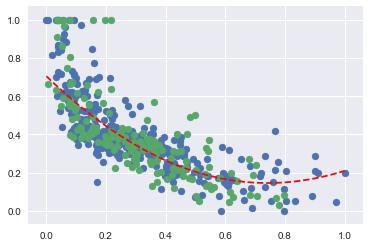

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# Le decimos a jupyter que grafique en  el cuaderno
%matplotlib inline
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_rbf.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--");

In [9]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.6549670658597944
Prueba 0.5959466433326677


In [10]:
# LIN

# Creando el modelo y entrenando
reg = svr_lin.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

Entrenamiento 0.5427835029461732
Prueba 0.5153691412881033


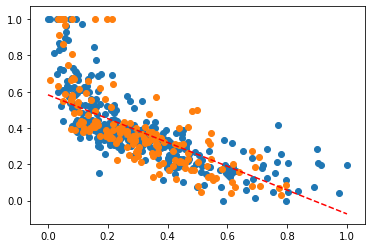

In [11]:
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_lin.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--");

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

In [12]:
# POLY

# Creando el modelo y entrenando
svr_poly.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = svr_poly.predict(X_train)
# Prediciendo valores de validación
y_test_hat = svr_poly.predict(X_test)

Entrenamiento 0.6807594509701385
Prueba 0.6128901480469988


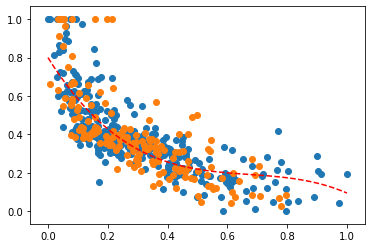

In [13]:
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_poly.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

RBF Entrenamiento 0.6549670658597944
RBF Prueba 0.5959466433326677
Linear Entrenamiento 0.5427835029461732
Linear Prueba 0.5153691412881033
Poly Entrenamiento 0.6807594509701385
Poly Prueba 0.6128901480469988


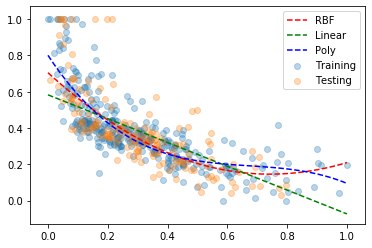

In [14]:
# vamos a realizar una sola gráfica donde ver los tres modelos:

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train,label="Training",alpha=0.3)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test, label="Testing",alpha=0.3)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_plot, y_plot, s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))

plt.legend();

RBF Entrenamiento 0.6549670658597944
RBF Prueba 0.5959466433326677
----
Linear Entrenamiento 0.5427835029461732
Linear Prueba 0.5153691412881033
----
Poly Entrenamiento 0.6807594509701385
Poly Prueba 0.6128901480469988
----


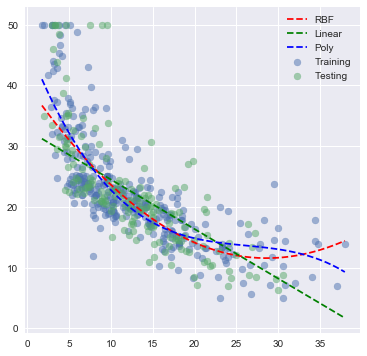

In [15]:
# REALIZAMOS LO MISMO PERO CON CAMBIOS DE ESTILO 
# EN LA GRÁFICA

# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)


from sklearn.svm import SVR
plt.style.use("seaborn")
plt.figure(figsize=(6,6))


svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_scaler.inverse_transform(X_train), y_scaler.inverse_transform(y_train.reshape(-1,1)),label="Training",alpha=0.5)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_scaler.inverse_transform(X_test), y_scaler.inverse_transform(y_test.reshape(-1,1)),label="Testing",alpha=0.5)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_scaler.inverse_transform(X_plot), y_scaler.inverse_transform(y_plot.reshape(-1,1)), s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))
    print("----")

plt.legend();